# PA2 Notebook 2x: Aggregate Reach Net Loads by Cluster

WARNING: This approach succeeds at calculating net reach loads over each COMID,
BUT it can not be used for summing over other geographies.

Comparisons with previous HUC12 and HUC8 summaries show that values are:
- Too low if negative values are preserved
- Too high if negative values are assigned `nan`

Even comparison among HUC12 `tp_load_net` values from this notebook vs nb2b shows big differences for most HUC12 (although some are identical!)

# Installation and Setup

Carefully follow our **[Installation Instructions](README.md#get-started)**, especially including:
- Creating a virtual environment for this repository (step 3)

## Import Python Dependencies

In [2]:
from pathlib import Path
from importlib import reload

import numpy     as np
import pandas    as pd
import geopandas as gpd

# import hvplot.pandas
import holoviews as hv
# import geoviews as gv

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
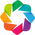

In [3]:
# Custom functions for Pollution Assessment
import pollution_assessment as pa

## Set Paths


In [4]:
# Set your project directory to your local folder for your clone of this repository
project_path = Path.cwd().parent
project_path

PosixPath('/Users/aaufdenkampe/Documents/Python/pollution-assessment')

In [5]:
# Assign a path for the geographies folder.
geography_path = project_path / 'geography/'

In [6]:
# Assign a path for the data OUTPUT folder.
data_output_path = project_path / 'stage2/data_output/'

## Test Plotting

In [7]:
# create sample data
data = np.random.normal(size=[50, 2])
df = pd.DataFrame(data, columns=['col1', 'col2'])

# create holoviews graph
hv_plot = hv.Points(df)
hv_plot

:Points   [col1,col2]

# Import Data

## Open Files from Notebooks 2 & 2b

In [8]:
# Geograhies
huc12_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc12_outlets_drwi_gdf.parquet')
huc10_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc10_outlets_drwi_gdf.parquet')
huc08_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc08_outlets_drwi_gdf.parquet')

In [9]:
# Results by COMID
reach_concs_gdf = gpd.read_parquet(data_output_path /'reach_concs_gdf.parquet')
catch_loads_gdf = gpd.read_parquet(data_output_path /'catch_loads_gdf.parquet')

# Net loads over HUC12, using Method 2 from Notebook 2b
huc12_outlet_loads_gdf = gpd.read_parquet(
    data_output_path / 'huc12_outlet_loads_gdf.parquet'
)

In [10]:
reach_concs_gdf.info()
reach_concs_gdf.iloc[:,0:25]

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 19496 entries, 1748535 to 932040370
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   catchment_hectares  19496 non-null  float64 
 1   watershed_hectares  19496 non-null  float64 
 2   maflowv             19496 non-null  float64 
 3   geometry            19494 non-null  geometry
 4   cluster             17358 non-null  category
 5   sub_focusarea       186 non-null    Int64   
 6   nord                18870 non-null  Int64   
 7   nordstop            18844 non-null  Int64   
 8   huc12               19496 non-null  category
 9   streamorder         19496 non-null  int64   
 10  headwater           19496 non-null  int64   
 11  phase               4082 non-null   category
 12  fa_name             4082 non-null   category
 13  in_drb              19496 non-null  boolean 
 14  huc08               19496 non-null  category
 15  huc10               194

,catchment_hectares,watershed_hectares,maflowv,geometry,cluster,sub_focusarea,nord,nordstop,huc12,streamorder,...,huc10,into_dr,tocomid,from_comids,ftype,gnis_name,gnis_id,streamleve,streamorde,Source
comid,,,,,,,,,,,,,,,,,,,,,
1748535,6496.7052,6501.69,43.699,MULTILINESTRING Z ((-8295323.930 5214456.622 0...,drb,<NA>,74914,74914,020401020302,1,...,0204010203,False,1748709,None,StreamRiver,East Branch Delaware River,949000,2,1,Reach Concentration
1748537,1663.1712,1664.46,11.189,MULTILINESTRING Z ((-8304623.226 5207684.737 0...,drb,<NA>,74913,74913,020401020302,1,...,0204010203,False,1748709,None,StreamRiver,,<NA>,3,1,Reach Concentration
1748539,1639.4128,1640.70,11.223,MULTILINESTRING Z ((-8316446.558 5197994.113 0...,drb,<NA>,74921,74921,020401020305,1,...,0204010203,False,1748543,None,StreamRiver,,<NA>,4,1,Reach Concentration
1748541,3013.8348,12912.30,86.528,MULTILINESTRING Z ((-8304282.841 5198049.613 0...,drb,<NA>,74911,74915,020401020302,2,...,0204010203,False,1748561,"[1748709, 1748711]",StreamRiver,East Branch Delaware River,949000,2,2,Reach Concentration
1748543,1151.0990,5232.87,35.389,MULTILINESTRING Z ((-8312991.936 5192442.779 0...,drb,<NA>,74920,74922,020401020305,2,...,0204010203,False,1748563,"[1748539, 1748713]",StreamRiver,Platte Kill,960689,3,2,Reach Concentration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932040366,2124.7248,2720941.47,17802.923,MULTILINESTRING Z ((-8400739.070 4831969.993 0...,drb,<NA>,65070,76964,020402060103,7,...,0204020601,False,24903456,"[932040355, 932040367]",ArtificialPath,Delaware River,217887,1,7,Reach Concentration
932040367,788.7859,2717821.26,17788.281,MULTILINESTRING Z ((-8399585.343 4833380.786 0...,drb,<NA>,65079,76964,020402060103,7,...,0204020601,False,932040366,"[932040356, 932040368]",ArtificialPath,Delaware River,217887,1,7,Reach Concentration
932040368,265.0275,2716120.08,17780.448,MULTILINESTRING Z ((-8398343.469 4834781.918 0...,drb,<NA>,65080,76960,020402060103,7,...,0204020601,False,932040367,"[24903436, 24903452]",ArtificialPath,Delaware River,217887,1,7,Reach Concentration


# Method 2b: Net loads by COMID

In [11]:
reach_loads_gdf = reach_concs_gdf.iloc[:,0:25].copy()

In [12]:
reach_loads_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 19496 entries, 1748535 to 932040370
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   catchment_hectares  19496 non-null  float64 
 1   watershed_hectares  19496 non-null  float64 
 2   maflowv             19496 non-null  float64 
 3   geometry            19494 non-null  geometry
 4   cluster             17358 non-null  category
 5   sub_focusarea       186 non-null    Int64   
 6   nord                18870 non-null  Int64   
 7   nordstop            18844 non-null  Int64   
 8   huc12               19496 non-null  category
 9   streamorder         19496 non-null  int64   
 10  headwater           19496 non-null  int64   
 11  phase               4082 non-null   category
 12  fa_name             4082 non-null   category
 13  in_drb              19496 non-null  boolean 
 14  huc08               19496 non-null  category
 15  huc10               194

In [13]:
reach_loads_gdf.from_comids

comid
1748535                                 None
1748537                                 None
1748539                                 None
1748541                   [1748709, 1748711]
1748543                   [1748539, 1748713]
                          ...               
932040366             [932040355, 932040367]
932040367             [932040356, 932040368]
932040368               [24903436, 24903452]
932040369    [24903444, 24903448, 932040360]
932040370             [932040361, 932040369]
Name: from_comids, Length: 19496, dtype: object

In [14]:
type(reach_loads_gdf.from_comids[932040369])

numpy.ndarray

### Back-Calculate Attenuated Loads at Outlets

Using Method 2 equation in header in `stage2/PA2_2b_AggregateAttenuated.ipynb`.

In [15]:
# Back calculate Loads (kg/y) from average annual concentrations (mg/L) 
# and mean annual flow (CFS))
for suffix in ['','_ps', '_xsnps', '_rem1', '_rem2', '_rem3', '_avoid']:
    for pollutant in ['tn', 'tp', 'tss']:
        reach_loads_gdf[f'{pollutant}_load{suffix}'] = (
            (reach_concs_gdf[f'{pollutant}_conc{suffix}'] * 28.3168 / 1000000)
            * reach_concs_gdf.maflowv * 31557600
        )

In [16]:
# Don't calculate load reductions
# We want to calculate load reductions from catchment loads, at their source

In [17]:
reach_loads_gdf.info()
reach_loads_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 19496 entries, 1748535 to 932040370
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   catchment_hectares  19496 non-null  float64 
 1   watershed_hectares  19496 non-null  float64 
 2   maflowv             19496 non-null  float64 
 3   geometry            19494 non-null  geometry
 4   cluster             17358 non-null  category
 5   sub_focusarea       186 non-null    Int64   
 6   nord                18870 non-null  Int64   
 7   nordstop            18844 non-null  Int64   
 8   huc12               19496 non-null  category
 9   streamorder         19496 non-null  int64   
 10  headwater           19496 non-null  int64   
 11  phase               4082 non-null   category
 12  fa_name             4082 non-null   category
 13  in_drb              19496 non-null  boolean 
 14  huc08               19496 non-null  category
 15  huc10               194

,catchment_hectares,watershed_hectares,maflowv,geometry,cluster,sub_focusarea,nord,nordstop,huc12,streamorder,...,tss_load_rem1,tn_load_rem2,tp_load_rem2,tss_load_rem2,tn_load_rem3,tp_load_rem3,tss_load_rem3,tn_load_avoid,tp_load_avoid,tss_load_avoid
comid,,,,,,,,,,,,,,,,,,,,,
1748535,6496.7052,6501.69,43.699,MULTILINESTRING Z ((-8295323.930 5214456.622 0...,drb,<NA>,74914,74914,020401020302,1,...,-8.164923e+06,-172025.360243,-2324.880448,-8.164923e+06,-172025.360243,-2324.880448,-8.164923e+06,0.0,0.0,0.0
1748537,1663.1712,1664.46,11.189,MULTILINESTRING Z ((-8304623.226 5207684.737 0...,drb,<NA>,74913,74913,020401020302,1,...,-2.171335e+06,-43522.069797,-536.508020,-2.171335e+06,-43522.069797,-536.508020,-2.171335e+06,0.0,0.0,0.0
1748539,1639.4128,1640.70,11.223,MULTILINESTRING Z ((-8316446.558 5197994.113 0...,drb,<NA>,74921,74921,020401020305,1,...,-2.128476e+06,-44303.681985,-545.380913,-2.128476e+06,-44303.681985,-545.380913,-2.128476e+06,0.0,0.0,0.0
1748541,3013.8348,12912.30,86.528,MULTILINESTRING Z ((-8304282.841 5198049.613 0...,drb,<NA>,74911,74915,020401020302,2,...,-1.612628e+07,-340092.990327,-4457.671727,-1.612628e+07,-340092.990327,-4457.671727,-1.612628e+07,0.0,0.0,0.0
1748543,1151.0990,5232.87,35.389,MULTILINESTRING Z ((-8312991.936 5192442.779 0...,drb,<NA>,74920,74922,020401020305,2,...,-6.821594e+06,-140017.819276,-1834.914201,-6.821594e+06,-140017.819276,-1834.914201,-6.821594e+06,0.0,0.0,0.0


## Functions for net loads
Adapted from `stage2/PA2_2b_AggregateAttenuated.ipynb` to be more general.

In [89]:
reload(pa.calc)

<module 'pollution_assessment.calc' from '/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/calc.py'>

In [18]:
# Moved to pa.calc module
# Adapted from `are_fromhucs_in_index()`
# def are_inlets_in_index(
#     df: pd.DataFrame,
#     inlets: np.ndarray,
# ) -> np.ndarray[bool]:
#     if type(inlets) == np.ndarray:
#         inarray = np.isin(inlets, df.index)
#     else:
#         inarray = False
#     return inarray

In [86]:
# Test function on a single good value
comid = 932040369
inlets = reach_loads_gdf.from_comids[comid]
pa.calc.are_inlets_in_index(reach_loads_gdf, inlets)

array([ True,  True,  True])

In [87]:
# Test function again on a bad value
comid = 1748535
inlets = reach_loads_gdf.from_comids[comid]
pa.calc.are_inlets_in_index(reach_loads_gdf, inlets)

False

In [90]:
# Moved to pa.calc module
# def get_inlet_loads(
#     df: pd.DataFrame, 
#     inlets_column: str ,
#     index_value: str | int,
#     var: str, 
# ) -> list:
#     """Fetches list of HUC12s that flow into a HUC12, if any.
#     var = f'{pollutant}_load{var_suffix}'
#     """
#     inlets_array = df.at[index_value,inlets_column]
#     if type(inlets_array) == np.ndarray:
#         inlets_mask = pa.calc.are_inlets_in_index(df, inlets_array)
#         ds = df[var][inlets_array[inlets_mask]]
#     else:
#         ds = []
#     return ds

# def calc_net_load(
#     df: pd.DataFrame, 
#     inlets_column: str ,
#     index_value: str | int,
#     var: str, 
# ) -> float:
#     """Calculates the net load of a HUC12, by subtracting inflow loads from outflow load.
#     var = f'{pollutant}_load{var_suffix}'
#     """
#     net = (df.at[index_value,var]
#         - sum(get_inlet_loads(df, inlets_column, index_value, var))
#     )
#     return net

## Confirm functions work

In [91]:
# Confirm functions work, with typical COMID
comid = 1748541
x = pa.calc.get_inlet_loads(
    df=reach_concs_gdf,
    inlets_column='from_comids',
    index_value=comid,
    var='tp_conc',
)
x

comid
1748709    0.031540
1748711    0.027446
Name: tp_conc, dtype: float64

In [23]:
sum(x)

0.0589858763088843

In [24]:
x.sum()

0.0589858763088843

In [25]:
reach_concs_gdf.at[comid,'tp_conc']

0.0323494736392782

In [26]:
calc_net_load(
    df=reach_concs_gdf,
    inlets_column='from_comids',
    index_value=comid,
    var='tp_conc',
)

-0.026636402669606096

In [27]:
# Confirm functions work, with COMID missing value
comid = 932040369
x = pa.calc.get_inlet_loads(
    df=reach_concs_gdf,
    inlets_column='from_comids',
    index_value=comid,
    var='tp_conc',
)
x

comid
24903444          NaN
24903448          NaN
932040360    0.437149
Name: tp_conc, dtype: float64

In [28]:
x.sum()

0.437148624560633

In [29]:
sum(x)

nan

In [30]:
reach_concs_gdf.at[comid,'tp_conc']

nan

In [31]:
calc_net_load(
    df=reach_concs_gdf,
    inlets_column='from_comids',
    index_value=comid,
    var='tp_conc',
)

nan

In [32]:
# Confirm functions work, with COMID with no inlets
comid = 1748535
x = pa.calc.get_inlet_loads(
    df=reach_concs_gdf,
    inlets_column='from_comids',
    index_value=comid,
    var='tp_conc',
)
x

[]

In [33]:
reach_concs_gdf.at[comid,'tp_conc']

0.0304638172253371

In [34]:
calc_net_load(
    df=reach_concs_gdf,
    inlets_column='from_comids',
    index_value=comid,
    var='tp_conc',
)

0.0304638172253371

## Add net loads

In [35]:
df = reach_loads_gdf

In [36]:
# Calc net flows
var = 'maflowv'
df[f'{var}_net'] = df.index.to_series().apply(
    lambda comid: pa.calc.calc_net_load(df, 'from_comids', comid, var)
)
# takes 8 sec

In [37]:
# Calc net pollution loads
for suffix in ['', '_ps', '_xsnps', '_rem1', '_rem2', '_rem3']:
    for pollutant in ['tn', 'tp', 'tss']:
        var = f'{pollutant}_load{suffix}'
        df[f'{var}_net'] = df.index.to_series().apply(
            lambda comid: pa.calc.calc_net_load(df, 'from_comids', comid, var)
        )
# takes 2 min

In [38]:
reach_loads_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 19496 entries, 1748535 to 932040370
Data columns (total 65 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   catchment_hectares  19496 non-null  float64 
 1   watershed_hectares  19496 non-null  float64 
 2   maflowv             19496 non-null  float64 
 3   geometry            19494 non-null  geometry
 4   cluster             17358 non-null  category
 5   sub_focusarea       186 non-null    Int64   
 6   nord                18870 non-null  Int64   
 7   nordstop            18844 non-null  Int64   
 8   huc12               19496 non-null  category
 9   streamorder         19496 non-null  int64   
 10  headwater           19496 non-null  int64   
 11  phase               4082 non-null   category
 12  fa_name             4082 non-null   category
 13  in_drb              19496 non-null  boolean 
 14  huc08               19496 non-null  category
 15  huc10               194

In [39]:
# How many HUC12s have a negative `maflowv_net`, due to water withdrawls
reach_loads_gdf.maflowv_net.lt(0).value_counts()

maflowv_net
False    19162
True       334
Name: count, dtype: int64

In [40]:
# This fraction (1.7%) is much lower than the 10.8% we had for HUC12s
334/19162

0.017430330863166685

In [41]:
net_neg_flow_mask = reach_loads_gdf.maflowv_net.lt(0)
net_neg_flow_list = net_neg_flow_mask[net_neg_flow_mask==True].index

In [42]:
# replace `net_neg_flow_mask` net loads with NaN
for suffix in ['', '_xsnps', '_rem1', '_rem2', '_rem3']:
    for pollutant in ['tn', 'tp', 'tss']:
        reach_loads_gdf.loc[net_neg_flow_mask,f'{pollutant}_load{suffix}_net'] = np.nan

# Sum by Geography

To compare with PA1-style catchment loads from `stage2/PA2_2_Analysis.ipynb`

In [43]:
# Create list of columns to aggregate
columns_to_aggregate = [
    'catchment_hectares',        # catcment area
    'tn_load_net', 'tp_load_net', 'tss_load_net', 
    'tn_load_ps_net', 'tp_load_ps_net', 'tss_load_ps_net',
    'tn_load_xsnps_net', 'tp_load_xsnps_net', 'tss_load_xsnps_net', 
    'tn_load_rem1_net', 'tp_load_rem1_net', 'tss_load_rem1_net', 
    'tn_load_rem2_net', 'tp_load_rem2_net', 'tss_load_rem2_net', 
    'tn_load_rem3_net', 'tp_load_rem3_net', 'tss_load_rem3_net'    
]

### Remove Negative Values

In [44]:
reach_loads_noneg_gdf = reach_loads_gdf.copy()

In [45]:
# True if negative
mask_negative = reach_loads_gdf[columns_to_aggregate].lt(0)

In [46]:
mask_negative

,catchment_hectares,tn_load_net,tp_load_net,tss_load_net,tn_load_ps_net,tp_load_ps_net,tss_load_ps_net,tn_load_xsnps_net,tp_load_xsnps_net,tss_load_xsnps_net,tn_load_rem1_net,tp_load_rem1_net,tss_load_rem1_net,tn_load_rem2_net,tp_load_rem2_net,tss_load_rem2_net,tn_load_rem3_net,tp_load_rem3_net,tss_load_rem3_net
comid,,,,,,,,,,,,,,,,,,,
1748535,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True
1748537,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True
1748539,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True
1748541,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True
1748543,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932040366,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
932040367,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
932040368,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [47]:
reach_loads_noneg_gdf[columns_to_aggregate] = reach_loads_gdf[columns_to_aggregate].mask(mask_negative, np.nan)
reach_loads_noneg_gdf

,catchment_hectares,watershed_hectares,maflowv,geometry,cluster,sub_focusarea,nord,nordstop,huc12,streamorder,...,tss_load_xsnps_net,tn_load_rem1_net,tp_load_rem1_net,tss_load_rem1_net,tn_load_rem2_net,tp_load_rem2_net,tss_load_rem2_net,tn_load_rem3_net,tp_load_rem3_net,tss_load_rem3_net
comid,,,,,,,,,,,,,,,,,,,,,
1748535,6496.7052,6501.69,43.699,MULTILINESTRING Z ((-8295323.930 5214456.622 0...,drb,<NA>,74914,74914,020401020302,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1748537,1663.1712,1664.46,11.189,MULTILINESTRING Z ((-8304623.226 5207684.737 0...,drb,<NA>,74913,74913,020401020302,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1748539,1639.4128,1640.70,11.223,MULTILINESTRING Z ((-8316446.558 5197994.113 0...,drb,<NA>,74921,74921,020401020305,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1748541,3013.8348,12912.30,86.528,MULTILINESTRING Z ((-8304282.841 5198049.613 0...,drb,<NA>,74911,74915,020401020302,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1748543,1151.0990,5232.87,35.389,MULTILINESTRING Z ((-8312991.936 5192442.779 0...,drb,<NA>,74920,74922,020401020305,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932040366,2124.7248,2720941.47,17802.923,MULTILINESTRING Z ((-8400739.070 4831969.993 0...,drb,<NA>,65070,76964,020402060103,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
932040367,788.7859,2717821.26,17788.281,MULTILINESTRING Z ((-8399585.343 4833380.786 0...,drb,<NA>,65079,76964,020402060103,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
932040368,265.0275,2716120.08,17780.448,MULTILINESTRING Z ((-8398343.469 4834781.918 0...,drb,<NA>,65080,76960,020402060103,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Sum DRWI
There's no Excess non-point source pollution, when attenuation in streams is considered!

In [48]:
# Sum selected columns and move to a new dataframe
drwi_load_reach_net_df = reach_loads_gdf.loc[:,columns_to_aggregate].sum()
drwi_load_reach_net_df

catchment_hectares    3.786557e+06
tn_load_net           4.718194e+07
tp_load_net           2.430376e+06
tss_load_net          1.602294e+09
tn_load_ps_net        1.214248e+07
tp_load_ps_net        1.090868e+06
tss_load_ps_net       0.000000e+00
tn_load_xsnps_net    -1.052291e+08
tp_load_xsnps_net    -1.376601e+06
tss_load_xsnps_net   -5.436197e+09
tn_load_rem1_net     -1.053179e+08
tp_load_rem1_net     -1.393488e+06
tss_load_rem1_net    -5.450146e+09
tn_load_rem2_net     -1.053192e+08
tp_load_rem2_net     -1.393867e+06
tss_load_rem2_net    -5.450296e+09
tn_load_rem3_net     -1.053451e+08
tp_load_rem3_net     -1.408568e+06
tss_load_rem3_net    -5.452153e+09
dtype: float64

In [49]:
# Sum selected columns and move to a new dataframe
drwi_load_reach_net_df = reach_loads_noneg_gdf.loc[:,columns_to_aggregate].sum()
drwi_load_reach_net_df

catchment_hectares    3.786557e+06
tn_load_net           4.850582e+07
tp_load_net           3.538701e+06
tss_load_net          1.998281e+09
tn_load_ps_net        1.259555e+07
tp_load_ps_net        1.590658e+06
tss_load_ps_net       0.000000e+00
tn_load_xsnps_net     3.314412e+06
tp_load_xsnps_net     7.843502e+05
tss_load_xsnps_net    1.943771e+08
tn_load_rem1_net      3.289690e+06
tp_load_rem1_net      7.643023e+05
tss_load_rem1_net     1.939637e+08
tn_load_rem2_net      3.289509e+06
tp_load_rem2_net      7.639486e+05
tss_load_rem2_net     1.939501e+08
tn_load_rem3_net      3.286660e+06
tp_load_rem3_net      7.488173e+05
tss_load_rem3_net     1.937208e+08
dtype: float64

### DRWI not in Clusters

In [50]:
mask = reach_loads_gdf['cluster'].isnull()

drwi_load_noClus_reach_net_df = reach_loads_gdf[mask].loc[:,
    columns_to_aggregate
].sum()

In [51]:
drwi_load_noClus_reach_net_df

catchment_hectares    1.403987e+05
tn_load_net           7.242151e+05
tp_load_net           3.314974e+04
tss_load_net          1.193807e+08
tn_load_ps_net        0.000000e+00
tp_load_ps_net        0.000000e+00
tss_load_ps_net       0.000000e+00
tn_load_xsnps_net    -2.375052e+06
tp_load_xsnps_net    -2.582151e+04
tss_load_xsnps_net   -3.610686e+07
tn_load_rem1_net     -2.375052e+06
tp_load_rem1_net     -2.582151e+04
tss_load_rem1_net    -3.610686e+07
tn_load_rem2_net     -2.375052e+06
tp_load_rem2_net     -2.582151e+04
tss_load_rem2_net    -3.610686e+07
tn_load_rem3_net     -2.375175e+06
tp_load_rem3_net     -2.583315e+04
tss_load_rem3_net    -3.611502e+07
dtype: float64

### DRWI loads in DRB

In [52]:
# Sum loads for DRB, excluding Clusters via mask
mask = reach_loads_gdf['in_drb']

# Preselect colums to keep
# Exclude non-summable dtypes (object, category, geometry)
drwi_load_drb_reach_net_df = reach_loads_gdf[mask].loc[:,
    columns_to_aggregate
].sum()

## Sum by Cluster

In [53]:
# Sum loads by Cluster categories
groupby_column = 'cluster'

cluster_load_reach_net_df = reach_loads_gdf.loc[:,
    [groupby_column, *columns_to_aggregate.copy()]
].groupby(groupby_column, observed=True).sum()

In [54]:
cluster_load_reach_net_df

,catchment_hectares,tn_load_net,tp_load_net,tss_load_net,tn_load_ps_net,tp_load_ps_net,tss_load_ps_net,tn_load_xsnps_net,tp_load_xsnps_net,tss_load_xsnps_net,tn_load_rem1_net,tp_load_rem1_net,tss_load_rem1_net,tn_load_rem2_net,tp_load_rem2_net,tss_load_rem2_net,tn_load_rem3_net,tp_load_rem3_net,tss_load_rem3_net
cluster,,,,,,,,,,,,,,,,,,,
Brandywine and Christina,1.457391e+05,3.392404e+06,7.854395e+04,8.808976e+07,3.901581e+05,11834.549253,0.0,-2.422393e+06,-38014.434358,-1.840534e+08,-2.452631e+06,-42692.166619,-1.920470e+08,-2.452631e+06,-42692.166619,-1.920470e+08,-2.456007e+06,-43853.366750,-1.922700e+08
Kirkwood - Cohansey Aquifer,5.501796e+05,4.312180e+06,1.099494e+05,1.348318e+08,9.388545e+05,44623.529615,0.0,-1.104001e+07,-209432.330203,-5.881365e+08,-1.104188e+07,-209656.507681,-5.883212e+08,-1.104237e+07,-209834.374429,-5.883934e+08,-1.104268e+07,-209907.225297,-5.884091e+08
Middle Schuylkill,2.029586e+05,8.607999e+06,5.545893e+05,1.845802e+08,3.411378e+06,250914.860963,0.0,-1.497842e+06,175852.480785,-1.512595e+08,-1.525712e+06,168249.716450,-1.541588e+08,-1.525712e+06,168249.716450,-1.541588e+08,-1.530397e+06,164382.967742,-1.547804e+08
New Jersey Highlands,1.786471e+05,1.756611e+06,8.733080e+04,6.078795e+07,3.492882e+05,19761.329435,0.0,-3.662105e+06,-29036.138020,-1.935302e+08,-3.679739e+06,-33454.749843,-1.966573e+08,-3.680070e+06,-33622.106081,-1.967123e+08,-3.680307e+06,-33825.373714,-1.967240e+08
Poconos and Kittatinny,3.424621e+05,1.268144e+06,3.621696e+04,5.242188e+07,1.091836e+05,3320.791739,0.0,-1.314888e+07,-240477.426583,-6.653757e+08,-1.314888e+07,-240474.841860,-6.653753e+08,-1.314888e+07,-240474.841860,-6.653753e+08,-1.314935e+07,-240820.738025,-6.654148e+08
Schuylkill Highlands,4.485511e+04,7.342290e+05,1.274759e+04,1.244251e+07,1.521494e+05,-1350.245775,0.0,-9.991574e+05,-22011.889817,-6.660496e+07,-9.995909e+05,-21760.155071,-6.652807e+07,-9.995909e+05,-21760.155071,-6.652807e+07,-1.000144e+06,-22006.608749,-6.653619e+07
Upper Lehigh,1.980298e+05,1.083662e+06,6.638532e+04,5.772078e+07,1.282264e+05,10551.168894,0.0,-1.129248e+07,-178125.365516,-5.567256e+08,-1.129248e+07,-178125.365516,-5.567256e+08,-1.129248e+07,-178125.365516,-5.567256e+08,-1.129373e+07,-179060.371802,-5.569297e+08
Upstream Suburban Philadelphia,3.741109e+04,5.109629e+05,2.347576e+04,2.945572e+07,8.831301e+04,7581.729357,0.0,-5.827872e+05,-3243.317226,-2.098592e+07,-5.839453e+05,-3569.426781,-2.125710e+07,-5.841506e+05,-3591.132081,-2.127466e+07,-5.843569e+05,-3754.200130,-2.128349e+07
drb,1.945876e+06,2.479153e+07,1.427987e+06,8.625824e+08,6.574933e+06,743630.578988,0.0,-5.820843e+07,-806291.409290,-2.973418e+09,-5.821798e+07,-806183.372879,-2.972969e+09,-5.821822e+07,-806194.880010,-2.972974e+09,-5.823300e+07,-813889.608042,-2.973690e+09


In [55]:
cluster_load_reach_net_df.tp_load_xsnps_net

cluster
Brandywine and Christina          -38014.434358
Kirkwood - Cohansey Aquifer      -209432.330203
Middle Schuylkill                 175852.480785
New Jersey Highlands              -29036.138020
Poconos and Kittatinny           -240477.426583
Schuylkill Highlands              -22011.889817
Upper Lehigh                     -178125.365516
Upstream Suburban Philadelphia     -3243.317226
drb                              -806291.409290
Name: tp_load_xsnps_net, dtype: float64

## Sum by Focus Area within Clusters

In [56]:
# Create merged name for Focus Area by Phase
reach_loads_gdf['fa_name_phase'] = (
    reach_loads_gdf.phase.dropna().astype('str') 
    + ' ' 
    + reach_loads_gdf.fa_name.dropna().astype('str')
    )
# Change type to category
reach_loads_gdf['fa_name_phase'] = reach_loads_gdf['fa_name_phase'].astype('category')

In [57]:
# Sum loads by Focus Area categories
groupby_column = 'fa_name_phase'

focusarea_load_reach_net_df = reach_loads_gdf.loc[:,
    [groupby_column, *columns_to_aggregate.copy()]
].groupby(groupby_column, observed=True).sum()

In [58]:
# Add back categoricals that were dropped
columns_to_restore = ['fa_name_phase','cluster', 'phase','fa_name']

left = focusarea_load_reach_net_df.copy()
right = reach_loads_gdf.loc[:,columns_to_restore].dropna().drop_duplicates()
focusarea_load_reach_net_df = pd.merge(left,right, on=groupby_column).set_index(groupby_column)

In [59]:
focusarea_load_reach_net_df.head()

,catchment_hectares,tn_load_net,tp_load_net,tss_load_net,tn_load_ps_net,tp_load_ps_net,tss_load_ps_net,tn_load_xsnps_net,tp_load_xsnps_net,tss_load_xsnps_net,...,tss_load_rem1_net,tn_load_rem2_net,tp_load_rem2_net,tss_load_rem2_net,tn_load_rem3_net,tp_load_rem3_net,tss_load_rem3_net,cluster,phase,fa_name
fa_name_phase,,,,,,,,,,,,,,,,,,,,,
Phase 1 Bear Creek,7167.2606,2.063096e+04,955.362713,1.013590e+06,-160.962189,-134.159930,0.0,-2.266228e+05,-3679.143405,-1.139516e+07,...,-1.139516e+07,-2.266228e+05,-3679.143405,-1.139516e+07,-2.266229e+05,-3676.557552,-1.139515e+07,Upper Lehigh,Phase 1,Bear Creek
Phase 1 Bush Kill/Hornbecks Creek,44484.9440,9.610384e+04,4213.489947,5.786433e+06,3188.721102,344.569986,0.0,-1.410800e+06,-24747.781220,-6.965358e+07,...,-6.965358e+07,-1.410800e+06,-24747.781220,-6.965358e+07,-1.410854e+06,-24801.212699,-6.965399e+07,Poconos and Kittatinny,Phase 1,Bush Kill/Hornbecks Creek
Phase 1 Cohansey-Maurice,79845.4069,1.096014e+06,8723.968306,6.509784e+06,410685.592634,9251.354181,0.0,-1.317101e+06,-38791.337544,-9.382364e+07,...,-9.384287e+07,-1.317914e+06,-38783.769849,-9.384287e+07,-1.317945e+06,-38781.657789,-9.384353e+07,Kirkwood - Cohansey Aquifer,Phase 1,Cohansey-Maurice
Phase 1 Core Pine Barrens,131694.8683,2.397288e+05,979.687215,9.673978e+06,4973.304437,406.606569,0.0,-3.679294e+06,-73901.442919,-1.866905e+08,...,-1.866905e+08,-3.679294e+06,-73901.442919,-1.866905e+08,-3.679298e+06,-73901.582145,-1.866906e+08,Kirkwood - Cohansey Aquifer,Phase 1,Core Pine Barrens
Phase 1 French Creek Headwaters,4599.8253,6.447803e+04,2730.972426,1.900736e+06,1.859789,36.154652,0.0,-4.938051e+04,528.411642,-3.811355e+06,...,-3.811188e+06,-4.942479e+04,514.947715,-3.811188e+06,-4.946338e+04,485.155731,-3.814250e+06,Schuylkill Highlands,Phase 1,French Creek Headwaters


In [60]:
focusarea_load_reach_net_df.tp_load_xsnps_net

fa_name_phase
Phase 1 Bear Creek                   -3679.143405
Phase 1 Bush Kill/Hornbecks Creek   -24747.781220
Phase 1 Cohansey-Maurice            -38791.337544
Phase 1 Core Pine Barrens           -73901.442919
Phase 1 French Creek Headwaters        528.411642
                                         ...     
Phase 2 Upper Musconetcong           -3950.337561
Phase 2 Upper Neversink              -4990.067108
Phase 2 Upper Salem River             4115.857289
Phase 2 Welkinweir/Beaver Run           26.540242
Phase 2 White Clay Creek              3879.757836
Name: tp_load_xsnps_net, Length: 98, dtype: float64

## Cluster loads NOT IN Focus Area (noFA)
To add to cluster summary by focus area, below

In [61]:
# Develop mask
mask = reach_loads_gdf['fa_name_phase'].isnull()
mask.value_counts()

fa_name_phase
True     15414
False     4082
Name: count, dtype: int64

In [62]:
# Sum loads by Cluster categories, excluding Focus Areas via mask
groupby_column = 'cluster'

cluster_load_noFA_reach_net_df = reach_loads_gdf[mask].loc[:,
    [groupby_column, *columns_to_aggregate.copy()]
].groupby(groupby_column, observed=True).sum()

In [63]:
cluster_load_noFA_reach_net_df.head()

,catchment_hectares,tn_load_net,tp_load_net,tss_load_net,tn_load_ps_net,tp_load_ps_net,tss_load_ps_net,tn_load_xsnps_net,tp_load_xsnps_net,tss_load_xsnps_net,tn_load_rem1_net,tp_load_rem1_net,tss_load_rem1_net,tn_load_rem2_net,tp_load_rem2_net,tss_load_rem2_net,tn_load_rem3_net,tp_load_rem3_net,tss_load_rem3_net
cluster,,,,,,,,,,,,,,,,,,,
Brandywine and Christina,126864.4144,2.961545e+06,55178.875903,7.455489e+07,3.815399e+05,11259.155365,0.0,-2.357587e+06,-51536.831167,-1.731535e+08,-2.373991e+06,-51423.487216,-1.757007e+08,-2.373991e+06,-51423.487216,-1.757007e+08,-2.376772e+06,-52186.340526,-1.757531e+08
Kirkwood - Cohansey Aquifer,229360.6413,1.303226e+06,31439.729348,6.935606e+07,7.609100e+04,479.261968,0.0,-4.677368e+06,-81400.348916,-2.268654e+08,-4.677369e+06,-81400.374773,-2.268650e+08,-4.677367e+06,-81400.254830,-2.268644e+08,-4.677489e+06,-81421.687859,-2.268717e+08
Middle Schuylkill,172185.0158,7.937341e+06,497285.247431,1.601129e+08,3.407278e+06,249196.633922,0.0,-1.342408e+06,135910.468120,-1.344882e+08,-1.358582e+06,132651.478126,-1.364621e+08,-1.358582e+06,132651.478126,-1.364621e+08,-1.362792e+06,129277.969612,-1.370195e+08
New Jersey Highlands,97953.7623,9.964659e+05,50666.298438,2.900426e+07,1.575425e+05,10978.693714,0.0,-1.841228e+06,-11412.522343,-1.054550e+08,-1.841659e+06,-11225.827358,-1.054017e+08,-1.841658e+06,-11223.314875,-1.054009e+08,-1.841866e+06,-11415.275379,-1.054103e+08
Poconos and Kittatinny,182634.0650,5.882385e+05,26256.577586,3.071131e+07,7.224932e+04,5488.424946,0.0,-5.887516e+06,-101135.840690,-2.905482e+08,-5.887516e+06,-101134.425017,-2.905479e+08,-5.887516e+06,-101134.425017,-2.905479e+08,-5.887802e+06,-101314.829680,-2.905814e+08


## Sum by HUC8 in DRB

In [64]:
# Initialize GDF with HUC names other info
huc08_load_reach_net_gdf = huc08_outlets_drwi_gdf.copy()

In [65]:
# Sum loads by HUC
groupby_column = 'huc08'
# Append to existing df
for column in columns_to_aggregate:
    columns = [column, groupby_column]
    huc08_load_reach_net_gdf[column] = reach_loads_gdf.loc[:,
        columns
    ].groupby(groupby_column, observed=True).sum()

In [66]:
huc08_load_reach_net_gdf

,huc08_name,geometry,comid,nord,in_drb,catchment_hectares,tn_load_net,tp_load_net,tss_load_net,tn_load_ps_net,...,tss_load_xsnps_net,tn_load_rem1_net,tp_load_rem1_net,tss_load_rem1_net,tn_load_rem2_net,tp_load_rem2_net,tss_load_rem2_net,tn_load_rem3_net,tp_load_rem3_net,tss_load_rem3_net
huc08,,,,,,,,,,,,,,,,,,,,,
02040101,Upper Delaware,"POLYGON ((-8304228.499 5229843.998, -8304203.8...",2619256,73297,True,308103.3782,9.520924e+05,35757.100280,2.720596e+07,4.010048e+04,...,-5.811891e+08,-1.121387e+07,-195129.651902,-5.811944e+08,-1.121387e+07,-195129.651902,-5.811944e+08,-1.121435e+07,-195382.235163,-5.812258e+08
02040102,East Branch Delaware,"POLYGON ((-8294284.604 5213730.686, -8294297.2...",1752159,74523,True,217471.8713,6.172578e+05,34529.261632,2.709106e+07,9.887940e+03,...,-5.340904e+08,-1.057843e+07,-180329.540500,-5.340904e+08,-1.057843e+07,-180329.540500,-5.340904e+08,-1.057843e+07,-180329.540500,-5.340904e+08
02040103,Lackawaxen,"POLYGON ((-8395173.834 5131609.270, -8395131.1...",2741462,72447,True,154757.2607,1.300035e+06,45820.913799,4.665877e+07,2.057863e+05,...,-6.451028e+08,-1.269488e+07,-225291.882217,-6.451028e+08,-1.269488e+07,-225291.882217,-6.451028e+08,-1.269802e+07,-226248.088658,-6.452517e+08
02040104,Middle Delaware-Mongaup-Brodhead,"POLYGON ((-8290255.809 5165720.405, -8290181.2...",4154510,70222,True,395876.6918,1.585567e+06,76129.014901,7.985978e+07,1.535378e+05,...,-7.949186e+08,-1.600460e+07,-275252.696538,-7.949186e+08,-1.600460e+07,-275252.696538,-7.949186e+08,-1.600518e+07,-275746.053256,-7.949602e+08
02040105,Middle Delaware-Musconetcong,"POLYGON ((-8318518.543 5039392.409, -8318515.1...",4481949,68818,True,351714.7924,3.313779e+06,233323.902527,1.493518e+08,7.028937e+05,...,-3.354897e+08,-7.071629e+06,-24044.958715,-3.386258e+08,-7.071961e+06,-24212.314953,-3.386809e+08,-7.074367e+06,-26380.600108,-3.388008e+08
02040106,Lehigh,"POLYGON ((-8394794.527 5054626.737, -8394728.2...",4188251,74985,True,352414.9584,4.541033e+06,391484.859901,1.821474e+08,1.491897e+06,...,-7.902991e+08,-1.630091e+07,-162990.964326,-7.904032e+08,-1.630116e+07,-163013.379525,-7.904146e+08,-1.630463e+07,-165768.656214,-7.908611e+08
02040201,Crosswicks-Neshaminy,"POLYGON ((-8361112.101 4923606.956, -8361020.3...",4485575,68274,True,140175.6970,1.645240e+06,86971.704840,8.963797e+07,6.387775e+05,...,-9.945541e+07,-2.766403e+06,-29396.912204,-9.945541e+07,-2.766403e+06,-29396.912204,-9.945541e+07,-2.767842e+06,-30130.333177,-9.949023e+07
02040202,Lower Delaware,"POLYGON ((-8354536.834 4895108.912, -8354450.1...",24903452,65081,True,298967.9128,5.734168e+06,454886.279100,2.804301e+08,2.547794e+06,...,-1.320396e+08,-5.037046e+06,-56066.735608,-1.321735e+08,-5.037244e+06,-56077.609116,-1.321856e+08,-5.038473e+06,-56854.724552,-1.322309e+08
02040203,Schuylkill,"POLYGON ((-8453246.777 4995405.859, -8453181.3...",4784841,65459,True,494849.1119,1.436887e+07,739024.181293,3.087013e+08,4.905242e+06,...,-5.850145e+08,-8.386807e+06,31337.621626,-5.874259e+08,-8.386807e+06,31337.621626,-5.874259e+08,-8.396228e+06,26025.730960,-5.881671e+08


In [67]:
huc08_load_reach_net_gdf.tp_load_xsnps_net

huc08
02040101   -195106.703918
02040102   -180329.540500
02040103   -225291.882217
02040104   -275252.696538
02040105    -19555.483571
02040106   -162811.415815
02040201    -29396.912204
02040202    -55893.819685
02040203     38465.496417
02040204         0.000000
02040205    -40929.080840
02040206    -64014.214163
02040207     -6381.883721
02040301   -104590.249189
02040302    -55512.955909
Name: tp_load_xsnps_net, dtype: float64

In [68]:
# No negative values
huc08_load_reach_net_noneg_gdf = huc08_outlets_drwi_gdf.copy()
# Sum loads by HUC
groupby_column = 'huc08'
# Append to existing df
for column in columns_to_aggregate:
    columns = [column, groupby_column]
    huc08_load_reach_net_noneg_gdf[column] = reach_loads_noneg_gdf.loc[:,
        columns
    ].groupby(groupby_column, observed=True).sum()

In [69]:
huc08_load_reach_net_noneg_gdf.tp_load_xsnps_net

huc08
02040101       981.948471
02040102       239.518105
02040103      1733.486786
02040104      1394.418504
02040105     57084.683427
02040106     88839.313933
02040201     16267.680197
02040202     31581.645266
02040203    365185.500054
02040204         0.000000
02040205     56188.088117
02040206     32686.484866
02040207    105294.618157
02040301     22254.882048
02040302      4617.972809
Name: tp_load_xsnps_net, dtype: float64

## Sum by HUC10 in DRB

In [70]:
# Initialize GDF with HUC names other info
huc10_load_reach_net_gdf = huc10_outlets_drwi_gdf.copy()

In [71]:
# Sum loads by HUC at selected level
groupby_column = 'huc10'
# Append to existing df
for column in columns_to_aggregate:
    columns = [column, groupby_column]
    huc10_load_reach_net_gdf[column] = reach_loads_gdf.loc[:,
        columns
    ].groupby(groupby_column, observed=True).sum()

In [72]:
huc10_load_reach_net_gdf.head()

,huc10_name,geometry,comid,nord,in_drb,huc08,catchment_hectares,tn_load_net,tp_load_net,tss_load_net,...,tss_load_xsnps_net,tn_load_rem1_net,tp_load_rem1_net,tss_load_rem1_net,tn_load_rem2_net,tp_load_rem2_net,tss_load_rem2_net,tn_load_rem3_net,tp_load_rem3_net,tss_load_rem3_net
huc10,,,,,,,,,,,,,,,,,,,,,
0204010101,Upper West Branch Delaware River,"POLYGON ((-8304262.020 5228828.467, -8304276.2...",2612826,74277,True,02040101,51001.7886,155995.114089,11731.349791,7.658411e+06,...,-6.624400e+07,-1.317070e+06,-16297.379027,-6.624400e+07,-1.317070e+06,-16297.379027,-6.624400e+07,-1.317070e+06,-16297.379027,-6.624400e+07
0204010102,Middle West Branch Delaware River,"POLYGON ((-8346041.487 5210211.202, -8345991.9...",2614138,74141,True,02040101,66948.2854,229407.642333,4838.545514,5.090761e+06,...,-9.770694e+07,-1.848474e+06,-34014.810588,-9.770694e+07,-1.848474e+06,-34014.810588,-9.770694e+07,-1.848474e+06,-34014.810588,-9.770694e+07
0204010103,Lower West Branch Delaware River,"POLYGON ((-8386125.641 5192313.974, -8386205.0...",2617290,73934,True,02040101,54778.4430,209207.239607,9532.192239,4.631452e+06,...,-1.282535e+08,-2.439675e+06,-40940.255315,-1.282599e+08,-2.439675e+06,-40940.255315,-1.282599e+08,-2.439717e+06,-40973.877047,-1.282634e+08
0204010104,Upper Delaware River,"POLYGON ((-8358825.391 5150856.311, -8358625.2...",2616816,73702,True,02040101,42273.9588,118567.010649,1885.550003,1.891606e+06,...,-8.196419e+07,-1.560786e+06,-30452.810871,-8.196376e+07,-1.560786e+06,-30452.810871,-8.196376e+07,-1.560873e+06,-30503.912111,-8.197015e+07
0204010105,Middle Delaware River,"POLYGON ((-8329217.537 5136231.813, -8329266.5...",2617486,73565,True,02040101,46119.2838,144201.091456,9603.895450,7.008700e+06,...,-1.013972e+08,-2.016201e+06,-31353.425132,-1.013970e+08,-2.016201e+06,-31353.425132,-1.013970e+08,-2.016305e+06,-31411.660627,-1.014034e+08


In [73]:
huc08_select = huc10_load_reach_net_gdf.huc08=='02040205' # Brandywine-Christina

huc10_load_reach_net_gdf.loc[huc08_select].tp_load_xsnps_net

huc10
0204020501     -576.781283
0204020502    14659.615472
0204020503    -2788.478230
0204020504   -24244.549870
0204020505   -25064.240447
0204020506     -799.675962
0204020507      755.884349
0204020508    -2870.854870
Name: tp_load_xsnps_net, dtype: float64

## Sum by HUC12

In [74]:
# Initialize GDF with HUC names other info
huc12_load_reach_net_gdf = huc12_outlets_drwi_gdf.copy()

In [75]:
# Sum loads by HUC at selected level
groupby_column = 'huc12'
# Append to existing df
for column in columns_to_aggregate:
    columns = [column, groupby_column]
    huc12_load_reach_net_gdf[column] = reach_loads_gdf.loc[:,
        columns
    ].groupby(groupby_column, observed=True).sum()

In [76]:
huc12_load_reach_net_gdf.head()

,huc12_name,geometry,centroid_xy,comid,nord,to_huc12,outlet_comid,from_huc12s,inlet_comids,outlet_comids,...,tss_load_xsnps_net,tn_load_rem1_net,tp_load_rem1_net,tss_load_rem1_net,tn_load_rem2_net,tp_load_rem2_net,tss_load_rem2_net,tn_load_rem3_net,tp_load_rem3_net,tss_load_rem3_net
huc12,,,,,,,,,,,,,,,,,,,,,
020401010101,Town Brook-Headwaters West Brach Delaware River,"POLYGON ((-8303725.462 5224646.990, -8303761.0...","[-74.62155936289159, 42.387091234041016]",2612792,74293,020401010102,2612792,None,None,[2612792],...,-1.064444e+07,-217020.271812,-2425.331527,-1.064444e+07,-217020.271812,-2425.331527,-1.064444e+07,-217020.271812,-2425.331527,-1.064444e+07
020401010102,Betty Brook-Headwaters West Brach Delaware River,"POLYGON ((-8315136.657 5225191.846, -8315097.2...","[-74.71393635968639, 42.38194565669812]",2612800,74290,020401010103,2612800,[020401010101],[2612792],"[2612800, 2612922]",...,-7.759074e+06,-151787.598208,-1695.274463,-7.759074e+06,-151787.598208,-1695.274463,-7.759074e+06,-151787.598208,-1695.274463,-7.759074e+06
020401010103,Rose Brook-Headwaters West Brach Delaware River,"POLYGON ((-8323990.577 5217953.339, -8323948.6...","[-74.71097819143394, 42.330665690562654]",2612808,74288,020401010104,2612808,[020401010102],[2612800],[2612808],...,-8.760651e+06,-149108.708569,-2015.238510,-8.760651e+06,-149108.708569,-2015.238510,-8.760651e+06,-149108.708569,-2015.238510,-8.760651e+06
020401010104,Elk Creek-Headwaters West Brach Delaware River,"POLYGON ((-8326727.279 5222215.417, -8326605.6...","[-74.82334627464569, 42.34506256688788]",2612820,74282,020401010106,2612820,[020401010103],[2612808],[2612820],...,-8.984379e+06,-166545.680774,-2106.386684,-8.984379e+06,-166545.680774,-2106.386684,-8.984379e+06,-166545.680774,-2106.386684,-8.984379e+06
020401010105,Upper Little Delaware River,"POLYGON ((-8319654.283 5208307.086, -8319607.8...","[-74.78436638151948, 42.27096486797448]",2612842,74311,020401010106,2612842,None,None,[2612842],...,-1.879417e+07,-390839.064157,-5253.900561,-1.879417e+07,-390839.064157,-5253.900561,-1.879417e+07,-390839.064157,-5253.900561,-1.879417e+07


In [77]:
huc08_select = huc12_load_reach_net_gdf.huc08=='02040205' # Brandywine-Christina
huc12_load_reach_net_gdf.loc[huc08_select].tp_load_net

huc12
020402050101     5370.242922
020402050102     3533.289396
020402050103    13477.489261
020402050104     7867.213518
020402050105     3441.894963
020402050201     2244.079011
020402050202    29550.836046
020402050203     6142.618227
020402050204     7291.936900
020402050205    -1917.106865
020402050301     4117.050407
020402050302     2099.136924
020402050303     8216.648375
020402050304     5535.408466
020402050305     1894.088814
020402050306      327.531313
020402050307     1705.518109
020402050308    -6688.196190
020402050401   -11588.859632
020402050402    -6339.361002
020402050403      283.673572
020402050501      894.299160
020402050502     6193.331526
020402050503    -5674.992486
020402050504      283.425800
020402050505      282.753437
020402050601      691.564171
020402050602     2537.790166
020402050701     2061.429644
020402050702    -1166.304158
020402050703    35584.631855
020402050704     1171.753504
020402050705     3203.117046
020402050801      812.429811
02040205

In [78]:
# No negative values
huc12_load_reach_net_noneg_gdf = huc12_outlets_drwi_gdf.copy()
# Sum loads by HUC
groupby_column = 'huc12'
# Append to existing df
for column in columns_to_aggregate:
    columns = [column, groupby_column]
    huc12_load_reach_net_noneg_gdf[column] = reach_loads_noneg_gdf.loc[:,
        columns
    ].groupby(groupby_column, observed=True).sum()

In [79]:
huc12_load_reach_net_noneg_gdf.loc[huc08_select].tp_load_net

huc12
020402050101     6849.568559
020402050102     4504.184383
020402050103    14719.436591
020402050104     8011.566876
020402050105    15258.144412
020402050201     2244.079011
020402050202    31137.688963
020402050203     6243.497394
020402050204     7291.936900
020402050205     3503.413726
020402050301     4117.050407
020402050302     2258.782338
020402050303     8665.769302
020402050304     5535.408466
020402050305     1894.088814
020402050306     1882.578393
020402050307     2030.581923
020402050308     2298.321743
020402050401     5462.396544
020402050402     2775.309292
020402050403      931.707133
020402050501      912.335037
020402050502     6195.599291
020402050503      642.530964
020402050504     1620.634763
020402050505    10782.385251
020402050601      707.932229
020402050602     2582.201776
020402050701     2064.477538
020402050702     1036.009086
020402050703    50370.677271
020402050704     1215.151961
020402050705     3811.405546
020402050801     1470.699632
02040205

# Save Reach Net Load Results

In [81]:

# Results by COMID
reach_loads_gdf.to_parquet(data_output_path /'reach_loads_gdf.parquet',compression='brotli')

# Aggregate by DRWI Geographies, for comparison to Pollution Assessment Stage 1 (PA1)
# As CSV files for easy import into Excel for final analysis similar to PA1.
drwi_load_reach_net_df.to_csv(data_output_path /'drwi_load_all_reach_net.csv')
drwi_load_noClus_reach_net_df.to_csv(data_output_path /'drwi_load_noClus_reach_net.csv')
drwi_load_drb_reach_net_df.to_csv(data_output_path /'drwi_load_drb_reach_net.csv')
cluster_load_reach_net_df.to_csv(data_output_path /'cluster_loads_reach_net.csv')
focusarea_load_reach_net_df.sort_values('cluster').to_csv(data_output_path /'focusarea_loads_byCluster_reach_net.csv')
cluster_load_noFA_reach_net_df.to_csv(data_output_path /'cluster_load_noFA_reach_net.csv')

# Aggregation by HUC, using Method 1 (Sum of Local Loads) similar to PA1
huc12_load_reach_net_gdf.to_parquet(data_output_path /'huc12_load_reach_net_gdf.parquet',compression='brotli')
huc10_load_reach_net_gdf.to_parquet(data_output_path /'huc10_load_reach_net_gdf.parquet',compression='brotli')
huc08_load_reach_net_gdf.to_parquet(data_output_path /'huc08_load_reach_net_gdf.parquet',compression='brotli')